# Analýza distribuce časů běžců běhu Pro Paměť národa

Časy mužů z běhu 17.5.2025

In [173]:
class RunRes:

    csv_header = ["startovni","trat","jmeno","prijmeni","rok","pohlavi","klub","kategorie","poradi_trat","poradi_kategorie","poradi_pohlavi","oficialni_cas"]
    csv_sep = ";"

    def __init__(self, row : str):
        row = row.split(RunRes.csv_sep)
        self.name = row[RunRes.csv_header.index("jmeno")] + " " + row[RunRes.csv_header.index("prijmeni")]
        self.gender = row[RunRes.csv_header.index("pohlavi")] # values: M or F
        t_str = row[RunRes.csv_header.index("oficialni_cas")]
        if RunRes.is_valid_time(t_str):
            self.time = RunRes.extract_float_time(t_str) # values format: hh:mm:ss
        else:
            self.time = None

    @staticmethod
    def is_valid_time(entry : str) -> bool:
        entry = entry.strip()
        if entry.find(":") == -1:
            return False
        if entry == "00:00:00":
            return False
        return True

    @staticmethod
    def extract_float_time(time_string : str) -> float:
        hrs,mins,secs = [int(num) for num in time_string.split(":")]
        tot_mins = hrs * 60 + mins + ((secs * 100) // 60 / 100) # get time in minutes truncated to 2 decimal places
        return tot_mins

In [174]:
import matplotlib.pyplot as plt

def get_valid_entries_for_year(year : int) -> list[RunRes]:
    return [entry for entry in get_entries_from_file(f"beh_pn_{year}.csv") if entry.time != None]

def get_entries_from_file(filename : str) -> list[RunRes]:
    csv_file = open(filename)
    csv_file.readline()
    results = [RunRes(row) for row in csv_file]
    return results

def plot_histogram(minutes : list[float], title : str = "", color = "blue") -> None:
    left_lim = 30
    right_lim = 90
    step = 1

    counts, bins, patches = plt.hist(minutes,range(left_lim,right_lim,step),color=color)
    plt.xticks(bins[::2],rotation=45)
    plt.ylim(0, 30)
    plt.title(title)


def overlap_plots(minutes_lists : list[list[float]], title : str, colors : list[str]) -> None:
    for minutes,color in zip(minutes_lists,colors):
        plot_histogram(minutes,title,color)
        

def print_year_plots(year : int):

    # all together
    minutes = [entry.time for entry in get_entries_from_file(f"beh_pn_{year}.csv") if entry.time != None]
    plot_histogram(minutes,f"M + F {year}", color="green")
    plt.show()
    
    # males
    minutes_m = [entry.time for entry in get_entries_from_file(f"beh_pn_{year}.csv") if entry.time != None and entry.gender =="M"]
    plot_histogram(minutes_m,f"M {year}",color="blue")
    plt.show()

    # females
    minutes_f = [entry.time for entry in get_entries_from_file(f"beh_pn_{year}.csv") if entry.time != None and entry.gender =="F"]
    plot_histogram(minutes_f,f"F {year}",color="red")
    plt.show()

    # overlap
    overlap_plots([minutes,minutes_m,minutes_f],"Combo",["green","blue","red"])


def compare_plots(years : list[int], genders: list[list[str]], colors : list[str], title = "Combo") -> None:

    minutes : list[list[float]] = []
    for year,gender in zip(years,genders):
        minutes.append([entry.time for entry in get_entries_from_file(f"beh_pn_{year}.csv") if entry.time != None and entry.gender in gender])
    
    overlap_plots(minutes,title,colors)


We can calculate sample mean and sample variance and deviation.

In [175]:
import functools as ft

def calc_mean(ls : list[int]) -> float:
    return ft.reduce(lambda x,y : x + y,ls) / len(ls)

def variance(ls : list[int]) -> float:
    mean = calc_mean(ls)
    variance = ft.reduce(lambda x,y : x + y,map(lambda x : (x-mean)**2,ls)) / len(ls)
    return variance

times_1 = [entry.time for entry in get_valid_entries_for_year(2025) if entry.time <= 75 and entry.gender == "F"]
mean_1 = calc_mean(times_1)
variance_1 = variance(times_1)

print(f"{mean_1=:<30}{variance_1=:<30}")

times_2 = [entry.time for entry in get_valid_entries_for_year(2024) if entry.time <= 75 and entry.gender == "F"]
mean_2 = calc_mean(times_2)
variance_2 = variance(times_2)

print(f"{mean_2=:<30}{variance_2=:<30}")

mean_1=58.616737588652505            variance_1=44.05904042050195             
mean_2=58.57836206896553             variance_2=35.4940809378716              


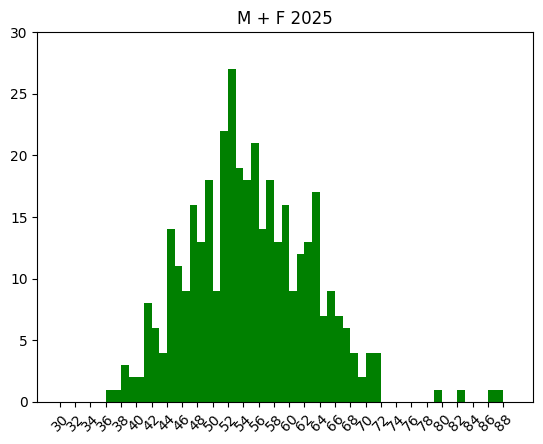

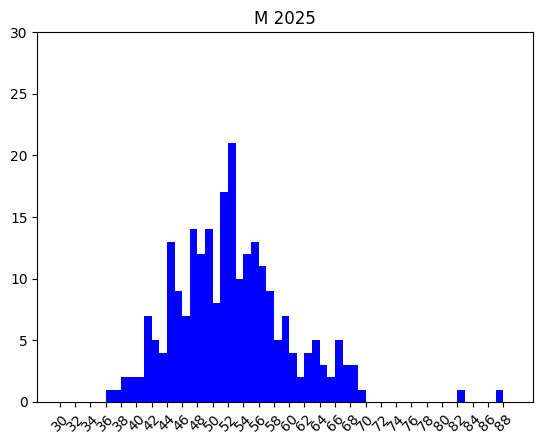

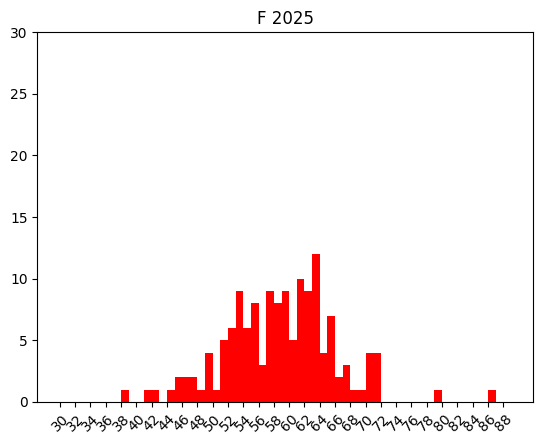

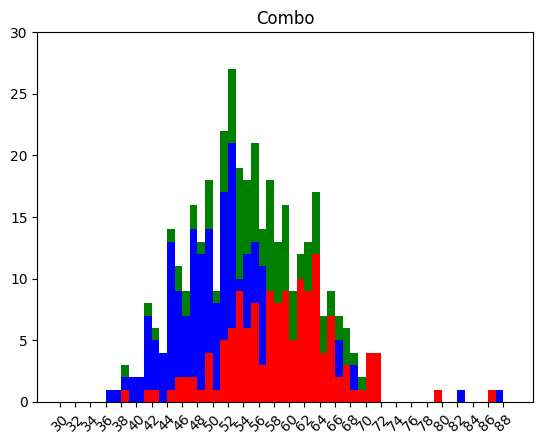

In [176]:
print_year_plots(2025)

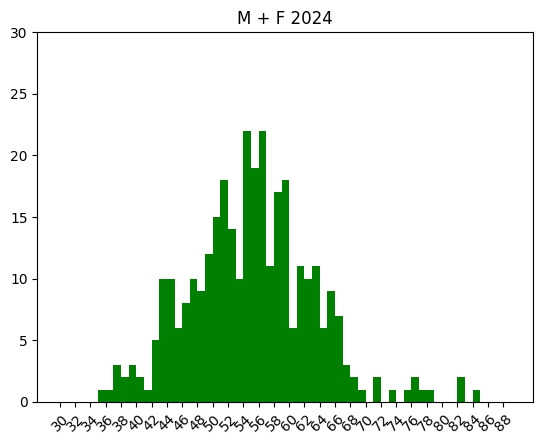

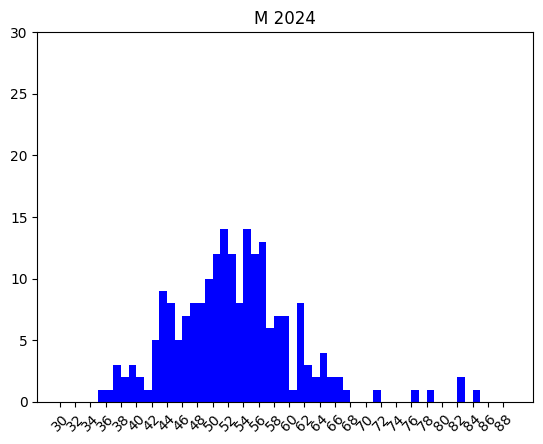

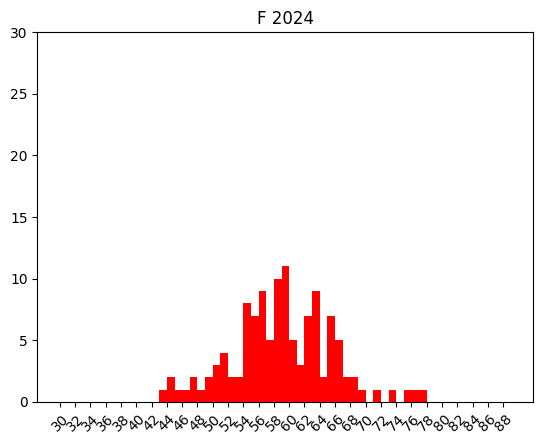

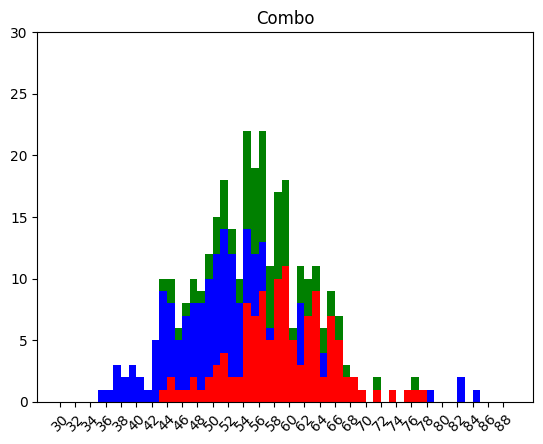

In [177]:
print_year_plots(2024)

In [178]:
# year1 = 2025
# year2 = 2024
# compare_plots([year1,year2],[["M","F"],["M","F"]],["darkgreen","lightgreen"],f"ALL {year1} vs {year2}")

In [179]:
# compare_plots([year1,year2],[["M"],["M"]],["darkblue","lightblue"],f"M {year1} vs {year2}")

In [180]:
# compare_plots([year1,year2],[["F"],["F"]],["darkred","lightcoral"],f"F {year1} vs {year2}")